In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import pandas_data_util
import tensorflow as tf

from datetime import datetime
from tensorflow.keras import backend as K

In [2]:
filename = 'data/bq-results-20211105-102236-1pg8as4q8dgo.csv'
train_percent=0.6
valid_percent=0.2
normalize=0
horizon=0
window=5
Data = pandas_data_util.DataUtil(filename,
                train_percent,
                valid_percent,
                horizon,
                window,
                normalize)

/home/derek/projects/ml/tf_2.4_src/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3357: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,14,20,45,58,59,82,83,84) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Index(['run_uri', 'vm_1_cloud', 'vm_2_cloud', 'sending_zone', 'receiving_zone',
       'vm_1_machine_type', 'vm_2_machine_type', 'ip_type',
       'vm_1_gce_network_tier', 'vm_2_gce_network_tier', 'ping_unit',
       'vm_1_kernel_release', 'vm_2_kernel_release', 'rmem_max',
       'tcp_congestion_control', 'tcp_max_receive_buffer',
       'tcp_max_send_buffer', 'vm_1_wmem_max', 'ping_interval_time_us',
       'ping_transaction_count', 'ping_timestamp', 'ping_max_latency',
       'ping_min_latency', 'ping_average_latency', 'ping_latency_std_dev',
       'sending_machine_type', 'receiving_machine_type', 'timestamp',
       'TCP_RR_Latency_p90', 'TCP_RR_Latency_p99', 'TCP_RR_Latency_p50',
       'TCP_RR_Latency_stddev', 'TCP_RR_Latency_mean',
       'TCP_RR_Transaction_Rate', 'TCP_RR_Latency_Histogram',
       'TCP_RR_Latency_max', 'TCP_RR_Latency_min', 'UDP_RR_Latency_max',
       'UDP_RR_Latency_p90', 'UDP_RR_Latency_min', 'UDP_RR_Latency_mean',
       'UDP_RR_Latency_p50', 'UDP_RR_Late

In [3]:
data_columns = ['pandas_datetime',
                'iperf_throughput_1_thread',
                'iperf_throughput_32_threads',
                'tcp_max_receive_buffer',
                'ping_average_latency',
                'n1-standard-16', 'n1-standard-2',
                'external', 'internal',
                'bbr', 'cubic',
                'Ubuntu 14.04', 'Ubuntu 16.04', 'Ubuntu 18.04', 'Ubuntu 20.04',
                'vm_1_machine_type',
                'ip_type',
                'tcp_congestion_control',
                'vm_1_os_info_trunc']


In [4]:
Data.train[0].shape

(47231, 5, 19)

In [5]:
Data.train[0][0,:,1:5]

array([[0.04933125917666938, -0.9595411198490194, 0.33139669932647203,
        -1.2144550340649938],
       [0.08613889326988307, -1.1547040041347774, 0.33139669932647203,
        -1.2139701358471657],
       [-0.415808176104979, -1.0390559313512544, 0.33139669932647203,
        -1.2077270712926262],
       [0.0714158396325976, -1.0919576222690681, 0.33139669932647203,
        -1.213739809193697],
       [-0.6361086823813986, -1.1458329639399703, 0.33139669932647203,
        -1.2158612388966958]], dtype=object)

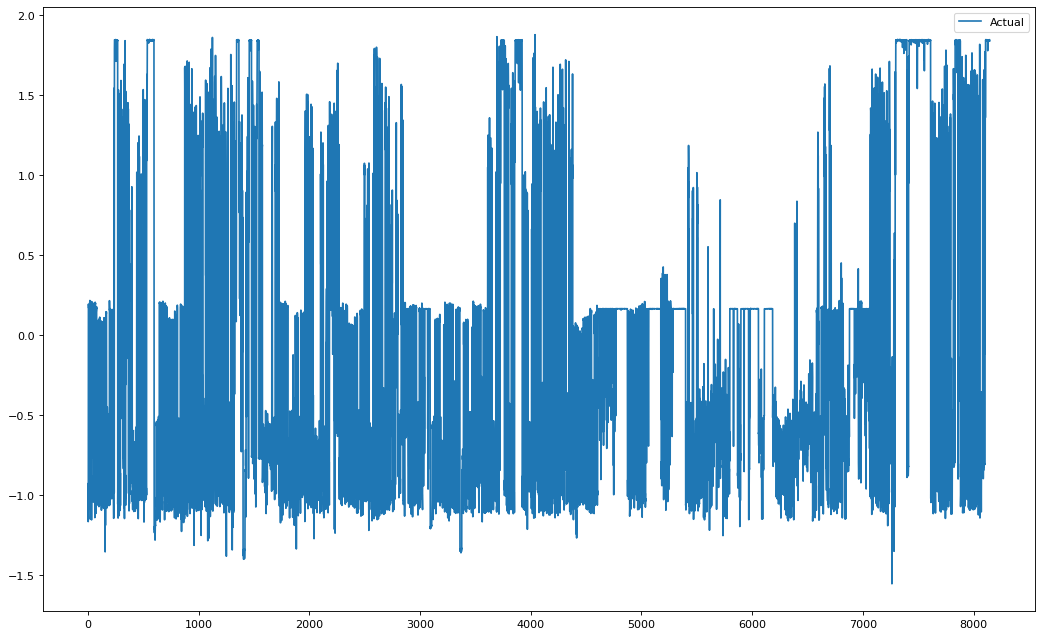

In [6]:
from matplotlib.pyplot import figure

figure(figsize=(16, 10), dpi=80)

plt.plot(Data.test[1][:,2])
# plt.plot(linear_predicted[0:25230])
plt.legend(["Actual", "Predicted"])
plt.show()

In [60]:
data_train_x_float32 = np.array(list(Data.train[0][:,:,1:15])).astype(np.float32)
data_train_y_float32 = np.array(list(Data.train[1][:,1:15])).astype(np.float32)

data_valid_x_float32 = np.array(list(Data.valid[0][:,:,1:15])).astype(np.float32)
data_valid_y_float32 = np.array(list(Data.valid[1][:,1:15])).astype(np.float32)

data_test_x_float32 = np.array(list(Data.test[0][:,:,1:15])).astype(np.float32)
data_test_y_float32 = np.array(list(Data.test[1][:,1:15])).astype(np.float32)

In [61]:
data_train_x_float32

array([[[ 0.04933126, -0.95954114,  0.3313967 , ...,  0.        ,
          1.        ,  0.        ],
        [ 0.0861389 , -1.154704  ,  0.3313967 , ...,  0.        ,
          1.        ,  0.        ],
        [-0.41580817, -1.039056  ,  0.3313967 , ...,  0.        ,
          1.        ,  0.        ],
        [ 0.07141584, -1.0919576 ,  0.3313967 , ...,  0.        ,
          1.        ,  0.        ],
        [-0.6361087 , -1.145833  ,  0.3313967 , ...,  0.        ,
          1.        ,  0.        ]],

       [[ 0.0861389 , -1.154704  ,  0.3313967 , ...,  0.        ,
          1.        ,  0.        ],
        [-0.41580817, -1.039056  ,  0.3313967 , ...,  0.        ,
          1.        ,  0.        ],
        [ 0.07141584, -1.0919576 ,  0.3313967 , ...,  0.        ,
          1.        ,  0.        ],
        [-0.6361087 , -1.145833  ,  0.3313967 , ...,  0.        ,
          1.        ,  0.        ],
        [-0.03382673, -0.81446713,  0.3313967 , ...,  0.        ,
          1.  

In [62]:
Data.train[1][:,1:11]

array([[-0.03382672895985041, -0.8144671576388189, 0.33139669932647203,
        ..., -1.1796011924743652, 1.9305758476257324, 1.1421207189559937],
       [0.07468762932977215, -1.1096997026586823, 0.33139669932647203,
        ..., -1.1796011924743652, 1.9305758476257324, 1.1421207189559937],
       [0.07523292761263456, -1.115541607177214, 0.33139669932647203,
        ..., -1.1796011924743652, 1.9305758476257324, 1.1421207189559937],
       ...,
       [3.9258567520456475, 1.841868463620884, -3.017523995473899, ...,
        0.8477420210838318, -0.5179789066314697, -1.3064342737197876],
       [0.3255248394464876, 0.863024906515818, -3.017523995473899, ...,
        0.8477420210838318, -0.5179789066314697, -1.3064342737197876],
       [0.1657524425677971, 1.8368920264384312, -3.017523995473899, ...,
        0.8477420210838318, -0.5179789066314697, -1.3064342737197876]],
      dtype=object)

In [63]:
Data.train[0][:,:,1:11]

array([[[0.04933125917666938, -0.9595411198490194, 0.33139669932647203,
         ..., -1.1796011924743652, 1.9305758476257324,
         1.1421207189559937],
        [0.08613889326988307, -1.1547040041347774, 0.33139669932647203,
         ..., -1.1796011924743652, 1.9305758476257324,
         1.1421207189559937],
        [-0.415808176104979, -1.0390559313512544, 0.33139669932647203,
         ..., -1.1796011924743652, 1.9305758476257324,
         1.1421207189559937],
        [0.0714158396325976, -1.0919576222690681, 0.33139669932647203,
         ..., -1.1796011924743652, 1.9305758476257324,
         1.1421207189559937],
        [-0.6361086823813986, -1.1458329639399703, 0.33139669932647203,
         ..., -1.1796011924743652, 1.9305758476257324,
         1.1421207189559937]],

       [[0.08613889326988307, -1.1547040041347774, 0.33139669932647203,
         ..., -1.1796011924743652, 1.9305758476257324,
         1.1421207189559937],
        [-0.415808176104979, -1.0390559313512544, 0.331396

In [64]:
#Root relative squared error
def tf_rse(y_true, y_pred):
    #
    # The formula is:
    #           K.sqrt(K.sum(K.square(y_true - y_pred)))     
    #    RSE = -----------------------------------------------
    #           K.sqrt(K.sum(K.square(y_true_mean - y_true)))       
    #
    #           K.sqrt(K.sum(K.square(y_true - y_pred))/(N-1))
    #        = ----------------------------------------------------
    #           K.sqrt(K.sum(K.square(y_true_mean - y_true)/(N-1)))
    #
    #
    #           K.sqrt(K.mean(K.square(y_true - y_pred)))
    #        = ------------------------------------------
    #           K.std(y_true)
    #
    num = K.sqrt(K.mean(K.square(y_true - y_pred), axis=None))
    den = K.std(y_true, axis=None)
    
    return num / den

def rse_test1(y_true, y_pred):
    return K.square(y_true - y_pred)

def rse_test2(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_true - y_pred), axis=None))

def rse_test3(y_true, y_pred):
    return K.std(y_true, axis=None)
  
def rse(y_true, y_pred):
    #
    # The formula is:
    #           K.sqrt(K.sum(K.square(y_true - y_pred)))     
    #    RSE = -----------------------------------------------
    #           K.sqrt(K.sum(K.square(y_true_mean - y_true)))       
    #
    #           K.sqrt(K.sum(K.square( y_true - y_pred))/(N-1))
    #        = ----------------------------------------------------
    #           K.sqrt(K.sum(K.square(y_true_mean - y_true)/(N-1)))
    #
    #
    #           K.sqrt(K.mean(K.square(y_true - y_pred)))
    #        = ------------------------------------------
    #           K.std(y_true)
    #
    num = np.sqrt(np.mean(np.square(y_true - y_pred), axis=None))
    den = np.std(y_true, axis=None)
    
    return num / den

def tf_corr(y_true, y_pred):
    #
    # This function calculates the correlation between the true and the predicted outputs
    #
    num1 = y_true - K.mean(y_true, axis=0)
    num2 = y_pred - K.mean(y_pred, axis=0)
    
    num  = K.mean(num1 * num2, axis=0)
    den  = K.std(y_true, axis=0) * K.std(y_pred, axis=0)
    
    return K.mean(num / den)

def corr(y_true, y_pred):
    #
    # This function calculates the correlation between the true and the predicted outputs
    #
    num1 = y_true - np.mean(y_true, axis=0)
    num2 = y_pred - np.mean(y_pred, axis=0)
    
    num  = np.mean(num1 * num2, axis=0)
    den  = np.std(y_true, axis=0) * np.std(y_pred, axis=0)
    
    return np.mean(num / den)
  

def single_rse(y_true, y_pred):
    #
    # The formula is:
    #           K.sqrt(K.sum(K.square(y_true - y_pred)))     
    #    RSE = -----------------------------------------------
    #           K.sqrt(K.sum(K.square(y_true_mean - y_true)))       
    #
    #           K.sqrt(K.sum(K.square(y_true - y_pred))/(N-1))
    #        = ----------------------------------------------------
    #           K.sqrt(K.sum(K.square(y_true_mean - y_true)/(N-1)))
    #
    #
    #           K.sqrt(K.mean(K.square(y_true - y_pred)))
    #        = ------------------------------------------
    #           K.std(y_true)
    #
    num = K.sqrt(K.mean(K.square(y_true[:,0] - y_pred[:,0]), axis=None))
    den = K.std(y_true, axis=None)
    
    return num / den


def single_corr(y_true, y_pred):
    #
    # This function calculates the correlation between the true and the predicted outputs
    #
    num1 = y_true[:,0] - K.mean(y_true[:,0], axis=0)
    num2 = y_pred[:,0] - K.mean(y_pred[:,0], axis=0)
    
    num  = K.mean(num1 * num2, axis=0)
    den  = K.std(y_true[:,0], axis=0) * K.std(y_pred[:,0], axis=0)
    
    return K.mean(num / den)

def mean_absolute_percentage_error(y_true, y_pred): 
  return np.mean(np.abs(y_true - y_pred) / np.abs(y_true)) * 100


In [65]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                patience=30,
                                                mode='min')

## Simple MLP

In [85]:
linear = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(5,14)),
    tf.keras.layers.Dense(units=100, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=100, activation='relu'),
    tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(units=20),
    tf.keras.layers.Dense(units=1),
])

In [86]:
linear.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf_rse, 
                         tf_corr, 
                         tf.metrics.MeanAbsoluteError(), 
                         tf.metrics.MeanSquaredError(), 
                         tf.metrics.RootMeanSquaredError(), 
                         tf.metrics.MeanAbsolutePercentageError()])

In [87]:
data_train_y_float32

array([[-0.03382673, -0.81446713,  0.3313967 , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.07468763, -1.1096997 ,  0.3313967 , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.07523293, -1.1155416 ,  0.3313967 , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 3.9258568 ,  1.8418685 , -3.017524  , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.32552484,  0.8630249 , -3.017524  , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.16575244,  1.836892  , -3.017524  , ...,  0.        ,
         0.        ,  1.        ]], dtype=float32)

In [88]:
 data_train_y_float32[:,1].reshape(data_train_y_float32[:,1].shape[0],1)

array([[-0.81446713],
       [-1.1096997 ],
       [-1.1155416 ],
       ...,
       [ 1.8418685 ],
       [ 0.8630249 ],
       [ 1.836892  ]], dtype=float32)

In [89]:
linear.fit(data_train_x_float32, 
           data_train_y_float32[:,1].reshape(data_train_y_float32[:,1].shape[0],1), 
           epochs=1000, 
           validation_data=(data_valid_x_float32, 
                            data_valid_y_float32[:,1].reshape(data_valid_y_float32[:,1].shape[0],1)), 
           callbacks=[early_stopping])

Epoch 1/1000
1476/1476 [==============================] - 7s 5ms/step - loss: 0.2458 - tf_rse: 0.4595 - tf_corr: 0.8877 - mean_absolute_error: 0.3289 - mean_squared_error: 0.2458 - root_mean_squared_error: 0.4795 - mean_absolute_percentage_error: 128.6940 - val_loss: 0.1198 - val_tf_rse: 1.1082 - val_tf_corr: 0.8645 - val_mean_absolute_error: 0.2240 - val_mean_squared_error: 0.1198 - val_root_mean_squared_error: 0.3461 - val_mean_absolute_percentage_error: 56.4418
Epoch 2/1000
1476/1476 [==============================] - 7s 5ms/step - loss: 0.1263 - tf_rse: 0.3482 - tf_corr: 0.9367 - mean_absolute_error: 0.2244 - mean_squared_error: 0.1263 - root_mean_squared_error: 0.3553 - mean_absolute_percentage_error: 281.9380 - val_loss: 0.1233 - val_tf_rse: 1.1187 - val_tf_corr: 0.8683 - val_mean_absolute_error: 0.2355 - val_mean_squared_error: 0.1233 - val_root_mean_squared_error: 0.3512 - val_mean_absolute_percentage_error: 54.2368
Epoch 3/1000
1476/1476 [==============================] - 7s 5

In [90]:
data_test_y_float32.shape

(8147, 14)

In [91]:
data_test_y_float32_reshaped = data_test_y_float32[:,1].reshape(data_test_y_float32[:,1].shape[0],1)

In [92]:
linear_stats = linear.evaluate(data_test_x_float32, data_test_y_float32[:,1].reshape(data_test_y_float32[:,1].shape[0],1))

linear_stats

255/255 [==============================] - 1s 3ms/step - loss: 0.1148 - tf_rse: 4.8832 - tf_corr: 0.7746 - mean_absolute_error: 0.2213 - mean_squared_error: 0.1148 - root_mean_squared_error: 0.3388 - mean_absolute_percentage_error: 76.6931


[0.11480160057544708,
 4.883183002471924,
 0.7746426463127136,
 0.22133006155490875,
 0.11480160057544708,
 0.3388238549232483,
 76.69305419921875]

In [93]:
linear_predicted = linear.predict(data_test_x_float32)

In [94]:
linear_predicted

array([[-0.8788729],
       [-0.896803 ],
       [-0.8708062],
       ...,
       [ 1.6894048],
       [ 1.6954739],
       [ 1.7033349]], dtype=float32)

In [95]:
data_test_y_float32_reshaped

array([[-1.0535525 ],
       [-0.93000704],
       [-1.1327428 ],
       ...,
       [ 1.8450058 ],
       [ 1.8464122 ],
       [ 1.8385148 ]], dtype=float32)

In [96]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

mse = mean_squared_error(data_test_y_float32_reshaped, linear_predicted.flatten())
rmse = sqrt(mean_squared_error(data_test_y_float32_reshaped, linear_predicted.flatten()))
mae = mean_absolute_error(data_test_y_float32_reshaped, linear_predicted.flatten())
rse_val = rse(data_test_y_float32_reshaped, linear_predicted.flatten())
mape = mean_absolute_percentage_error(data_test_y_float32_reshaped, linear_predicted.flatten())

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'RSE: {rse_val}')
print(f'MAPE: {mape}')

MSE: 0.11480166763067245
RMSE: 0.33882394784116493
MAE: 0.22133012115955353
RSE: 1.3028827905654907
MAPE: 418.9761161804199


In [97]:
#stats for 3 variables
# MSE: 0.11168965697288513
# RMSE: 0.3342000253933041
# MAE: 0.181667298078537
# RSE: 1.4175187349319458
# MAPE: 501.4033317565918

In [98]:
Data.test[1][:,1]

array([0.06132782139964273, 0.07959531387553397, 0.08913803382562639, ...,
       4.579396744056264, 4.915573135440948, 3.1128170122977723],
      dtype=object)

In [99]:
Data.test[1][:,2]

array([-1.0535525092305735, -0.930007047005332, -1.1327427704817792, ...,
       1.8450057827141695, 1.8464121671352973, 1.8385147776935788],
      dtype=object)

In [100]:
linear_predicted

array([[-0.8788729],
       [-0.896803 ],
       [-0.8708062],
       ...,
       [ 1.6894048],
       [ 1.6954739],
       [ 1.7033349]], dtype=float32)

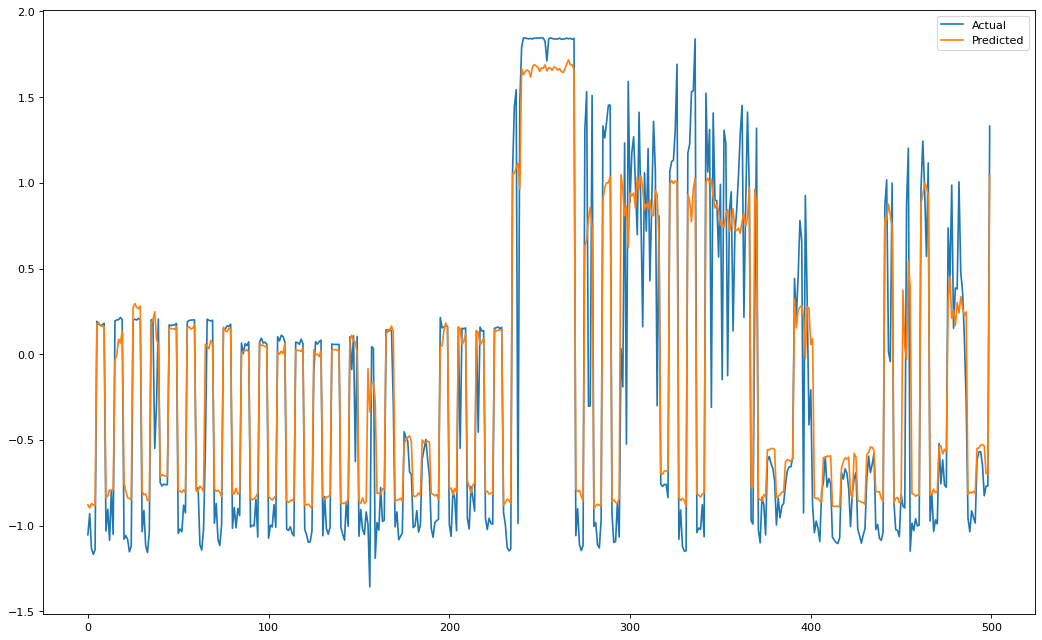

In [101]:
from matplotlib.pyplot import figure

figure(figsize=(16, 10), dpi=80)

plt.plot(Data.test[1][0:500,2])
plt.plot(linear_predicted[0:500])
plt.legend(["Actual", "Predicted"])
plt.show()

In [102]:
linear_predicted_valid = linear.predict(data_valid_x_float32)

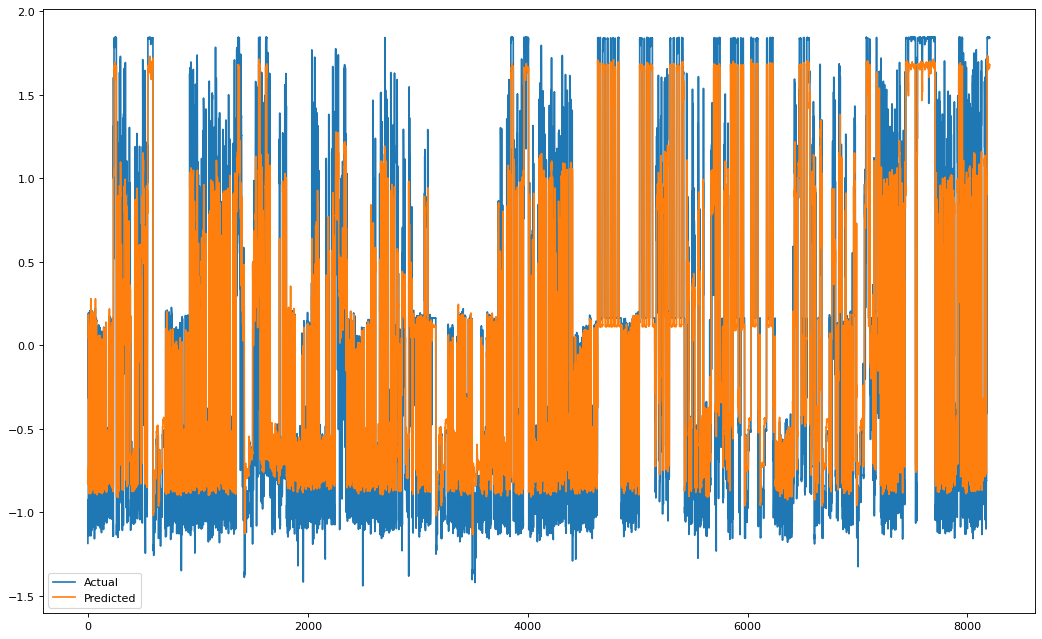

In [103]:
from matplotlib.pyplot import figure

figure(figsize=(16, 10), dpi=80)

plt.plot(Data.valid[1][:,2])
plt.plot(linear_predicted_valid)
plt.legend(["Actual", "Predicted"])
plt.show()

In [58]:
linear_predicted_train = linear.predict(data_train_x_float32)

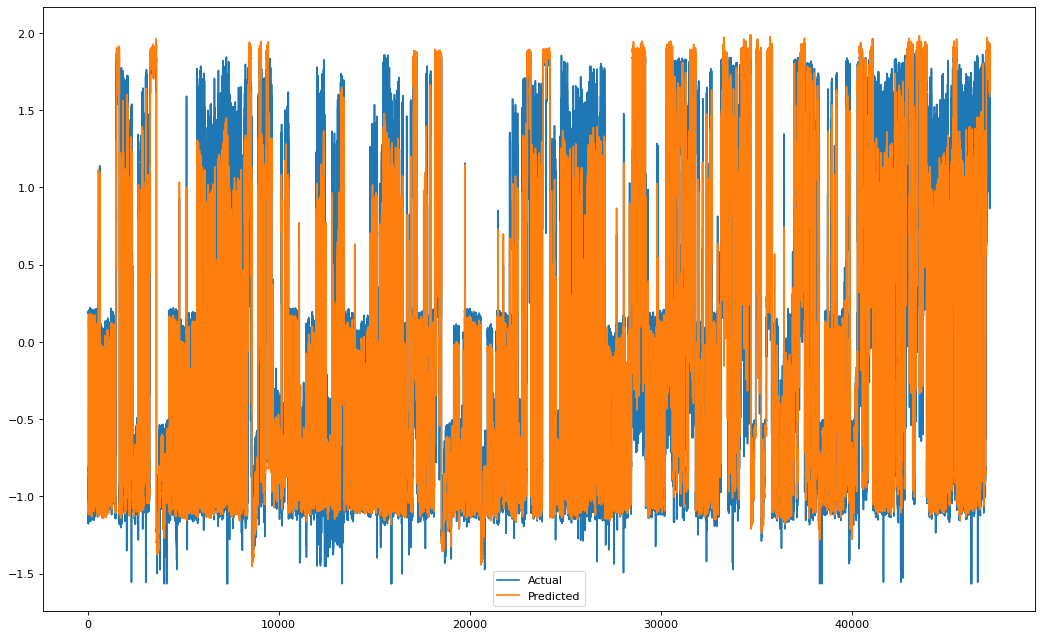

In [59]:
from matplotlib.pyplot import figure

figure(figsize=(16, 10), dpi=80)

plt.plot(Data.train[1][:,2])
plt.plot(linear_predicted_train)
plt.legend(["Actual", "Predicted"])
plt.show()

In [31]:
Data.test[0][6000:6200]

array([[[Timestamp('2021-10-10 06:02:13.536027+0000', tz='UTC'),
         2.5609751500409983, 0.16394366579820782, ..., 'internal',
         'cubic', 'Ubuntu 18.04'],
        [Timestamp('2021-10-11 09:02:36.483580+0000', tz='UTC'),
         2.571335817415384, 0.1630781984621291, ..., 'internal',
         'cubic', 'Ubuntu 18.04'],
        [Timestamp('2021-10-12 12:05:41.832825+0000', tz='UTC'),
         2.3395840471988536, 0.16361911554717828, ..., 'internal',
         'cubic', 'Ubuntu 18.04'],
        [Timestamp('2021-10-13 15:06:40.306389+0000', tz='UTC'),
         1.7910139746392544, 0.16286183162810938, ..., 'internal',
         'cubic', 'Ubuntu 18.04'],
        [Timestamp('2021-10-14 18:01:12.601048+0000', tz='UTC'),
         2.4750906704901663, 0.16318638187913892, ..., 'internal',
         'cubic', 'Ubuntu 18.04']],

       [[Timestamp('2021-10-11 09:02:36.483580+0000', tz='UTC'),
         2.571335817415384, 0.1630781984621291, ..., 'internal',
         'cubic', 'Ubuntu 18.04'],


In [32]:
data_test_x_float32[6000:6200]

array([[[ 2.560975  ,  0.16394366, -3.017524  , -1.367198  ],
        [ 2.5713358 ,  0.1630782 , -3.017524  , -1.3670161 ],
        [ 2.339584  ,  0.16361912, -3.017524  , -1.3664342 ],
        [ 1.791014  ,  0.16286184, -3.017524  , -1.366604  ],
        [ 2.4750907 ,  0.16318639, -3.017524  , -1.3664342 ]],

       [[ 2.5713358 ,  0.1630782 , -3.017524  , -1.3670161 ],
        [ 2.339584  ,  0.16361912, -3.017524  , -1.3664342 ],
        [ 1.791014  ,  0.16286184, -3.017524  , -1.366604  ],
        [ 2.4750907 ,  0.16318639, -3.017524  , -1.3664342 ],
        [ 2.368485  ,  0.16340275, -3.017524  , -1.36641   ]],

       [[ 2.339584  ,  0.16361912, -3.017524  , -1.3664342 ],
        [ 1.791014  ,  0.16286184, -3.017524  , -1.366604  ],
        [ 2.4750907 ,  0.16318639, -3.017524  , -1.3664342 ],
        [ 2.368485  ,  0.16340275, -3.017524  , -1.36641   ],
        [ 2.2708764 ,  0.16361912, -3.017524  , -1.3662282 ]],

       ...,

       [[ 0.4978391 , -0.67902154, -3.017524  , -1.

In [33]:
data_test_y_float32_reshaped[6000:6200]

array([[ 0.16340275],
       [ 0.16361912],
       [ 0.16351093],
       [ 0.16383548],
       [ 0.1637273 ],
       [ 0.1637273 ],
       [ 0.16340275],
       [ 0.16275364],
       [ 0.16394366],
       [ 0.16340275],
       [ 0.16340275],
       [ 0.16329457],
       [ 0.16286184],
       [ 0.16383548],
       [ 0.16329457],
       [ 0.1637273 ],
       [ 0.16329457],
       [ 0.16221273],
       [ 0.16340275],
       [ 0.16361912],
       [ 0.16383548],
       [ 0.16351093],
       [ 0.16405185],
       [ 0.16361912],
       [ 0.1637273 ],
       [ 0.16394366],
       [ 0.16351093],
       [ 0.1637273 ],
       [ 0.16275364],
       [ 0.16351093],
       [ 0.16361912],
       [ 0.16329457],
       [ 0.16199636],
       [ 0.16297002],
       [ 0.16297002],
       [ 0.16318639],
       [ 0.16351093],
       [ 0.16394366],
       [ 0.1630782 ],
       [ 0.16264546],
       [ 0.16351093],
       [ 0.16275364],
       [ 0.16383548],
       [ 0.1630782 ],
       [ 0.16351093],
       [ 0